<a href="https://colab.research.google.com/github/savig-vi/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def display_results(y_test, y_pred, cm_title):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d').set_title(cm_title)
    print(classification_report(y_test,y_pred))

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/amateurdev29/doan_ttnt1/main/Hotel%20Reservations.csv',encoding='unicode_escape')
df = pd.DataFrame(data)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
subset = df.iloc[:, 1:-1]
subset.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
type_of_meal_plan_mapping = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2, 'Meal Plan 3':3}
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(type_of_meal_plan_mapping)

room_type_reserved_mapping = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6,'Room_Type 7':7}
df['room_type_reserved'] = df['room_type_reserved'].map(room_type_reserved_mapping)

market_segment_type_mapping = {'Online':1, 'Offline':2, 'Corporate':3, 'Complementary':4, 'Aviation':5}
df['market_segment_type'] = df['market_segment_type'].map(market_segment_type_mapping)

booking_status_mapping = {'Not_Canceled':0, 'Canceled':1}
df['booking_status'] = df['booking_status'].map(booking_status_mapping)

In [6]:
# Hàm isna() dùng để kiểm tra giá trị thiếu, ở đây kiểm tra giá trị thiếu của từng cột và đếm tổng số lượng thiếu từng cột
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.fillna(df.mean(), inplace=True, axis=0)
df = df.round()
df

<ipython-input-7-b2322ee4780e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True, axis=0)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.0,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,107.0,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.0,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.0,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,168.0,1,0
36271,INN36272,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,91.0,2,1
36272,INN36273,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.0,2,0
36273,INN36274,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.0,0,1


In [8]:
df = df.drop('Booking_ID', axis=1)
X = df.iloc[:, :17]
y = df.iloc[:,17]

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Tiêu chuẩn hóa dữ liệu
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Khởi tạo PCA với số lượng thành phần chính mong muốn
n_components = 4
pca = PCA(n_components=n_components)

# Thực hiện PCA trên dữ liệu tiêu chuẩn hóa
X_pca = pca.fit_transform(X_std)

In [10]:
X_std

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.298889,-0.261467,0.217398,-0.144801,0.104197,-0.178817,-0.506404,1.614874,-2.137440,0.839230,-1.555641,0.810590,-0.162208,-0.063392,-0.087455,-1.094865,-0.788129
1,0.298889,-0.261467,1.365974,0.563964,-1.978307,-0.178817,-0.506404,-0.933688,0.467837,1.164974,-1.097998,-0.656683,-0.162208,-0.063392,-0.087455,0.102215,0.483754
2,-1.628953,-0.261467,1.365974,-0.853566,0.104197,-0.178817,-0.506404,-0.980237,0.467837,-1.766723,1.419035,-0.656683,-0.162208,-0.063392,-0.087455,-1.237374,-0.788129
3,0.298889,-0.261467,-0.931177,-0.144801,0.104197,-0.178817,-0.506404,1.463590,0.467837,-0.789491,0.503751,-0.656683,-0.162208,-0.063392,-0.087455,-0.097299,-0.788129
4,0.298889,-0.261467,0.217398,-0.853566,-1.978307,-0.178817,-0.506404,-0.433285,0.467837,-1.115235,-0.525945,-0.656683,-0.162208,-0.063392,-0.087455,-0.268310,-0.788129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226730,-0.261467,1.365974,2.690259,0.104197,-0.178817,1.636681,-0.002706,0.467837,0.187742,-1.441230,-0.656683,-0.162208,-0.063392,-0.087455,1.840830,0.483754
36271,0.298889,-0.261467,0.217398,0.563964,0.104197,-0.178817,-0.506404,1.661423,0.467837,0.839230,0.160519,-0.656683,-0.162208,-0.063392,-0.087455,-0.353816,1.755637
36272,0.298889,-0.261467,1.365974,2.690259,0.104197,-0.178817,-0.506404,0.730442,0.467837,-0.138002,-1.670051,-0.656683,-0.162208,-0.063392,-0.087455,-0.154302,1.755637
36273,0.298889,-0.261467,-0.931177,0.563964,-1.978307,-0.178817,-0.506404,-0.258726,0.467837,-1.115235,0.618161,-0.656683,-0.162208,-0.063392,-0.087455,-0.268310,-0.788129


In [11]:
X_pca

array([[ 1.27186597, -1.73593776,  1.5473272 ,  0.20819444],
       [-0.73117101,  0.01219499, -1.4660617 , -0.30338063],
       [ 0.97195537, -0.47916415, -1.84892002,  0.02538216],
       ...,
       [-1.1820735 , -0.31630052, -0.49496575,  1.99703089],
       [-0.07094114, -0.31795148, -2.16755228, -0.10075655],
       [-0.3446479 , -0.528276  ,  1.17584005,  0.91278626]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state = 42)

svm = SVC()

parameters_dictionary = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(svm,
                           parameters_dictionary, 
                           scoring = 'f1',
                           return_train_score=True, 
                           cv = 3,
                           verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .kernel=linear;, score=(train=0.463, test=0.470) total time=  19.0s
[CV 2/3] END .kernel=linear;, score=(train=0.459, test=0.451) total time=  12.1s
[CV 3/3] END .kernel=linear;, score=(train=0.455, test=0.458) total time=  11.1s
[CV 1/3] END ...kernel=poly;, score=(train=0.335, test=0.328) total time=  14.1s
[CV 2/3] END ...kernel=poly;, score=(train=0.325, test=0.325) total time=  13.0s
[CV 3/3] END ...kernel=poly;, score=(train=0.328, test=0.319) total time=  14.6s
[CV 1/3] END ....kernel=rbf;, score=(train=0.510, test=0.506) total time=  11.6s
[CV 2/3] END ....kernel=rbf;, score=(train=0.512, test=0.509) total time=  10.9s
[CV 3/3] END ....kernel=rbf;, score=(train=0.506, test=0.507) total time=  11.0s
[CV 1/3] END kernel=sigmoid;, score=(train=0.452, test=0.455) total time=   9.7s
[CV 2/3] END kernel=sigmoid;, score=(train=0.461, test=0.456) total time=   9.6s
[CV 3/3] END kernel=sigmoid;, score=(train=0.459,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='f1', verbose=3)

In [21]:
grid_search.best_estimator_.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [13]:
grid_save = grid_search
joblib.dump(grid_save, '/content/drive/MyDrive/Colab Notebooks/grid.joblib')

['/content/drive/MyDrive/Colab Notebooks/grid.joblib']

In [14]:
grid_load = joblib.load('/content/drive/MyDrive/Colab Notebooks/grid.joblib')

In [15]:
y_pred = grid_load.best_estimator_.predict(X_test)

In [16]:
best_parameters = grid_load.best_params_ # Show the best hyperparameters for SVC
best_f1 = grid_load.best_score_ # Show the best f1-score 

print('The best model was:', grid_load.best_estimator_)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: SVC()
The best parameter values were: {'kernel': 'rbf'}
The best f1-score was: 0.507197894759685


In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9122,  620],
       [2909, 1859]])

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In ra màn hình các thông số đánh giá
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.756788421778084
Precision: 0.7498991528842275
Recall: 0.3898909395973154
F1-Score: 0.5130398785704429


              precision    recall  f1-score   support

           0       0.76      0.94      0.84      9742
           1       0.75      0.39      0.51      4768

    accuracy                           0.76     14510
   macro avg       0.75      0.66      0.68     14510
weighted avg       0.76      0.76      0.73     14510



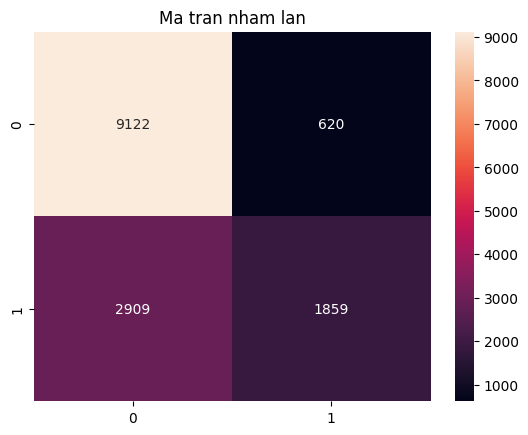

In [19]:
display_results(y_test, y_pred, 'Ma tran nham lan')